In [1]:
import numpy as np
import pandas as pd
import nltk


In [2]:
hotstar = pd.read_csv('D:/study/datasets/hotstar.allreviews_Sentiments.csv')

In [3]:

hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [4]:
hotstar.isnull().sum()

ID                       0
UserName               722
Created_Date             0
Reviews                  0
Lower_Case_Reviews       0
Sentiment_Manual_BP      0
Sentiment_Manual         0
Review_Length            0
DataSource               0
Year                     0
Month                    0
Date                     0
Sentiment_Polarity       0
dtype: int64

In [5]:
hotstar.shape

(5053, 13)

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



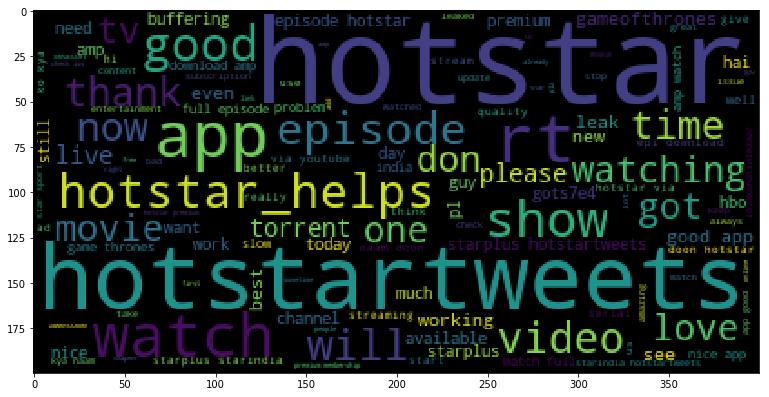

In [7]:
input_string = ' '.join(hotstar['Lower_Case_Reviews'])
wc = WordCloud(background_color='black').generate(input_string)
plt.figure(figsize=(13,8))
plt.imshow(wc)

In [8]:
docs = hotstar['Lower_Case_Reviews'].str.lower().str.replace('[^a-z @#]', '')

In [9]:
docs.head()

0                                                   hh
1                                                   no
2    @hotstarhelps during paymnt for premium subscr...
3    @hotstartweets i am currently on jio network a...
4    @hotstartweets the episodes of sarabhai vs sar...
Name: Lower_Case_Reviews, dtype: object

In [10]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords
len(stopwords) # we have 179 stopwords in english

179

In [11]:
# now we will remove stopwords from our reviews
stemmer = nltk.stem.PorterStemmer()
docs_clean = []
for doc in docs.head():
    words = doc.split(' ')
    #print(doc)
    #print(words)
    words_clean = []
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word))
    doc_clean = ' '.join(words_clean)
    docs_clean.append(doc_clean)
print(docs_clean)

['hh', '', '@hotstarhelp paymnt premium subscript transact fail twice receiv refund one transact', '@hotstartweet current jio network would like know whether abl watch epl telecast star sport select hd', '@hotstartweet episod sarabhai vs sarabhai season  download abl watch offlin pleas smthng']


In [12]:

def clean_sentences(text):
    stemmer = nltk.stem.PorterStemmer()
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentences)
docs_clean

0                                                      hh
1                                                        
2       @hotstarhelp paymnt premium subscript transact...
3       @hotstartweet current jio network would like k...
4       @hotstartweet episod sarabhai vs sarabhai seas...
5       @hotstartweet abl  watch latest episod got app...
6       pleas allow rupay maestro payment gateway prem...
7       @hotstarhelp today epi #lovekahaiintezaar nt a...
8       @hotstartweet #hotstarfraud paid subscript  ju...
9       @hotstartweet premium accnt hotstar show tht p...
10      @hotstartweet see blank page term amp condit h...
11      @hotstartweet sir pleas allow us download vide...
12      @hotstarhelp hi pl tab sport homepag isl bunde...
13      @hotstartweet unabl watch star sport select hd...
14      @hotstartweet great could keep track watch acr...
15      @hotstartweet sir mobil intern disk ltd space ...
16      @hotstartweet sir want dwnld episod mahabharat...
17      rt @ay

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)

In [14]:
dtm

<5053x6152 sparse matrix of type '<class 'numpy.int64'>'
	with 37312 stored elements in Compressed Sparse Row format>

In [15]:
dtm.shape

(5053, 6152)

In [16]:
no_of_zeroes = (5053 * 6152) - 37312
sparsity = (no_of_zeroes)/(5053*6152) *100
sparsity

99.87997190766174

In [17]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns=vectorizer.get_feature_names())

In [18]:
df_dtm

,aa,aaaaaand,aaaaah,aab,aabe,aacikelqcgv,aadat,aadhaar,aadhaarmem,aadhitamizhan,...,zeemoham,zeetv,zero,zinab,zindabad,ziuoubngwejxo,zmilap,znmd,zombi,zzzune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# to find total number of zeros
(df_dtm ==0).sum().sum()

31048744

In [20]:
df_dtm.sum().sort_values(ascending = False).head(2)

hotstartweet    1367
hotstar         1359
dtype: int64

In [21]:
df_dtm.sum(axis=1).sort_values(ascending=False).head(2)

5040    55
5051    50
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df_dtm,
                                  test_size=0.2,
                                  random_state=100)

In [23]:
train_y = hotstar.iloc[train_x.index]['Sentiment_Manual']
test_y = hotstar.iloc[test_x.index]['Sentiment_Manual']

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model= RandomForestClassifier(random_state=100, n_estimators=300)
rf_model.fit(train_x,train_y)
rf_predict = rf_model.predict(test_x)
accuracy_score(test_y, rf_predict)

0.7329376854599406

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
rf_model= MultinomialNB()
rf_model.fit(train_x,train_y)
rf_predict = rf_model.predict(test_x)
accuracy_score(test_y, rf_predict)

0.7378832838773491

In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
rf_model= PassiveAggressiveClassifier()
rf_model.fit(train_x,train_y)
rf_predict = rf_model.predict(test_x)
accuracy_score(test_y, rf_predict)

E:\Repositories\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7240356083086054

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

train, test = train_test_split(docs_clean, test_size=.2, random_state = 100)

tfidf= TfidfVectorizer()
tfidf.fit(train)
train_dtm_tfidf = tfidf.transform(train)
test_dtm_tfidf = tfidf.transform(test)

df_train_tfidf = pd.DataFrame(train_dtm_tfidf.toarray(),
                             columns=tfidf.get_feature_names())

df_test_tfidf = pd.DataFrame(test_dtm_tfidf.toarray(),
                             columns=tfidf.get_feature_names())

train_y = hotstar.iloc[df_train_tfidf.index]['Sentiment_Manual']
test_y = hotstar.iloc[df_test_tfidf.index]['Sentiment_Manual']

rf_model = RandomForestClassifier(random_state=100,
                                 n_estimators=300)

rf_model.fit(df_train_tfidf,train_y)
rf_predict = rf_model.predict(df_test_tfidf)
accuracy_score(test_y, rf_predict)

0.2818991097922849

# Sentiment Analysis Exercise

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

E:\Repositories\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [29]:
def get_sentiment(text):
    sentiment = SentimentIntensityAnalyzer()
    compound = sentiment.polarity_scores(text)['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

hotstar['sentiment_vader'] = hotstar['Lower_Case_Reviews'].apply(get_sentiment)

In [30]:
hotstar['sentiment_vader'].value_counts()

Positive    2401
Neutral     1697
Negative     955
Name: sentiment_vader, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(hotstar['Sentiment_Manual'], hotstar['sentiment_vader'])

0.5507619236097367

# We can Clearly See that Supervised Learning gives much better results.

# Chart

In [34]:
df_ht_pos = hotstar[hotstar['sentiment_vader']=='Positive'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()
df_ht_neg = hotstar[hotstar['sentiment_vader']=='Negative'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()
df_ht_neu = hotstar[hotstar['sentiment_vader']=='Neutral'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()
#df_ht_pos.head()


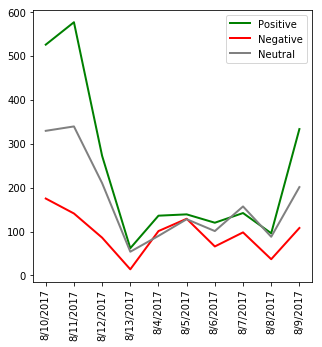

In [35]:
plt.figure(figsize=(5,5))
plt.plot('Created_Date', 'sentiment_vader', data=df_ht_pos, color='green', linewidth=2, label='Positive')
plt.plot('Created_Date', 'sentiment_vader', data=df_ht_neg, color='red', linewidth=2, label='Negative')
plt.plot('Created_Date', 'sentiment_vader', data=df_ht_neu, color='grey', linewidth=2, label='Neutral')
plt.xticks(rotation=90)
plt.legend()
plt.show()